# Histgram Generation with Mitsuba

In [1]:
import mitsuba as mi
import numpy as np
import matplotlib.pyplot as plt
import os

# Set Mitsuba variant
mi.set_variant("scalar_rgb")

In [2]:
folder_path = "water"

# Try to find the XML scene file
xml_files = [f for f in os.listdir(folder_path) if f.endswith('.xml')]
if not xml_files:
    raise FileNotFoundError("No .xml scene file found in folder.")

scene_path = os.path.join(folder_path, xml_files[0])
scene = mi.load_file(scene_path)

In [12]:
# Get sensor
sensor = scene.sensors()[0]
film = sensor.film()
resolution = film.crop_size()

# Parameters
num_iterations = 30
width, height = resolution

# Storage for histogram values
radiance_samples = np.zeros((num_iterations, height, width, 3))  # RGB per sample

# Prepare sampler and integrator
sampler = sensor.sampler()
integrator = scene.integrator()

for i in range(num_iterations):
    sampler.seed(i)
    for y in range(1, height):
        for x in range(1, width):
            # Normalized pixel coordinates
            pos = mi.Point2f([(x + 0.5) / width, (y + 0.5) / height])

            # sample1 is typically a float in [0,1), can be sampler.next_1d()
            sample1 = sampler.next_1d()
            sample2 = sampler.next_2d()
            sample3 = sampler.next_2d()

            # Generate the ray
            ray, _ = sensor.sample_ray(time=0.0, sample1=sample1, sample2=pos, sample3=sample2)
            radiance_value = integrator.sample(scene, sampler, ray)

            # Get radiance of each channel
            r = float(radiance_value[0][0])
            g = float(radiance_value[0][1])
            b = float(radiance_value[0][2])

            radiance_samples[i, y, x] = np.array([r, g, b])

    print(f"Iteration {i} ...")   

print("Sampling complete.")

Iteration {i} ...
Iteration {i} ...
Iteration {i} ...
Iteration {i} ...
Iteration {i} ...
Iteration {i} ...
Iteration {i} ...
Iteration {i} ...
Iteration {i} ...
Iteration {i} ...
Iteration {i} ...
Iteration {i} ...
Iteration {i} ...
Iteration {i} ...
Iteration {i} ...
Iteration {i} ...
Iteration {i} ...
Iteration {i} ...
Iteration {i} ...
Iteration {i} ...
Iteration {i} ...
Iteration {i} ...
Iteration {i} ...
Iteration {i} ...
Iteration {i} ...
Iteration {i} ...
Iteration {i} ...
Iteration {i} ...
Iteration {i} ...
Iteration {i} ...
Sampling complete.


In [20]:
print("[T, H, W, C] --->", radiance_samples.shape)

[T, H, W, C] ---> (30, 720, 1280, 3)


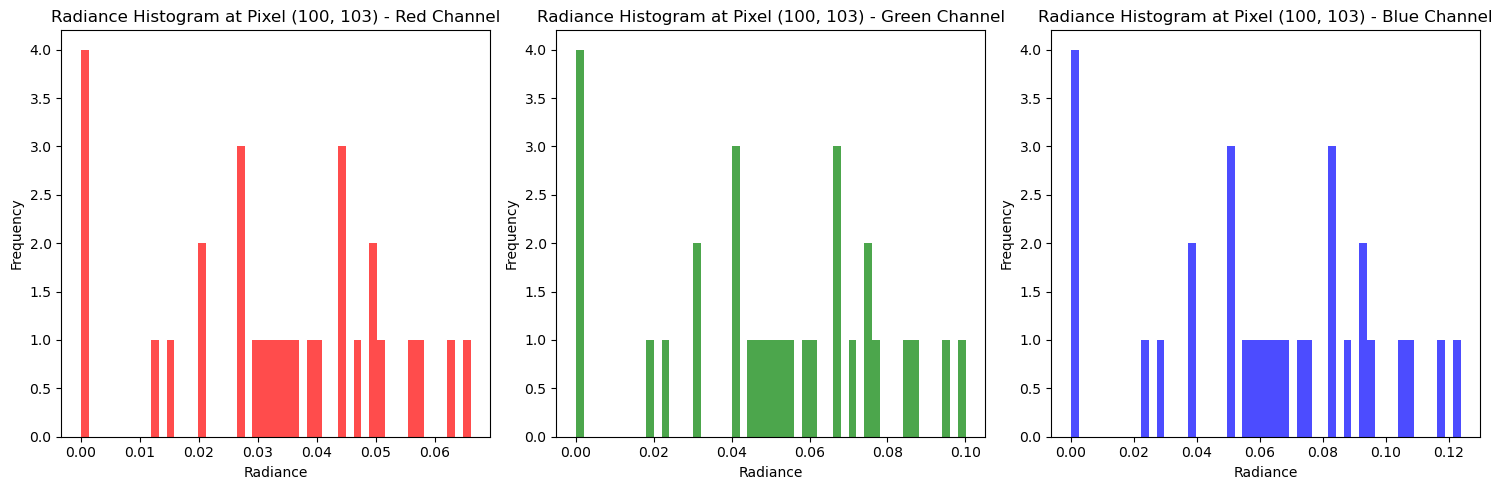

In [22]:
import matplotlib.pyplot as plt

# Pixel coordinates
y, x = 103, 100

# Channel names and colors
channels = ['Red', 'Green', 'Blue']
colors = ['red', 'green', 'blue']

# Create a figure with subplots
plt.figure(figsize=(15, 5))

for i in range(3):  # Loop through R, G, B channels
    pixel_samples = radiance_samples[:, y, x, i]  # Get samples for current channel
    
    plt.subplot(1, 3, i+1)  # Create a subplot for each channel
    plt.hist(pixel_samples, bins=50, alpha=0.7, color=colors[i])
    plt.title(f"Radiance Histogram at Pixel ({x}, {y}) - {channels[i]} Channel")
    plt.xlabel("Radiance")
    plt.ylabel("Frequency")

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

In [14]:
def average_radiance(radiance_samples, start=0, end=None):
    """
    Compute average radiance over slices [start:end] of the samples.
    If end is None, average to the last slice.
    """
    if end is None or end > radiance_samples.shape[0]:
        end = radiance_samples.shape[0]
    avg = radiance_samples[start:end].mean(axis=0)  # average over iterations
    return avg  # shape (height, width, 3)

In [15]:
import matplotlib.pyplot as plt

def plot_image(image, title=None):
    """
    image: numpy array of shape (height, width, 3)
    """
    # Clip or normalize for display if needed
    img_clipped = image.clip(0, 1)  # assuming linear radiance normalized roughly
    
    plt.figure(figsize=(8, 6))
    plt.imshow(img_clipped)
    if title:
        plt.title(title)
    plt.axis('off')
    plt.show()

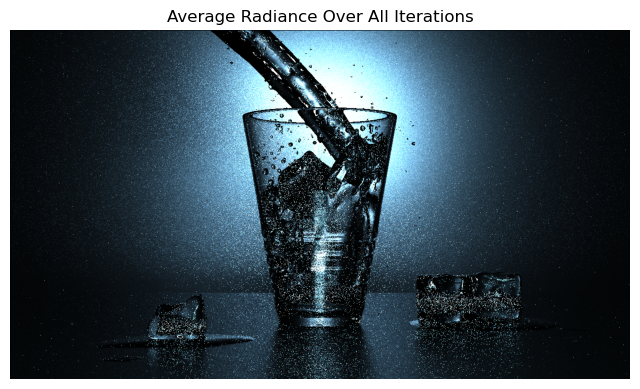

In [16]:
# Average over all samples
avg_image = average_radiance(radiance_samples)

# Plot average image
plot_image(avg_image, title="Average Radiance Over All Iterations")

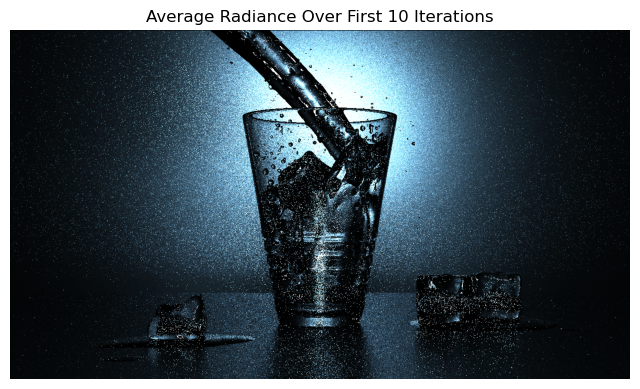

In [17]:
# Average over first N samples (e.g., 50)
N = 10
avg_50 = average_radiance(radiance_samples, end=N)
plot_image(avg_50, title=f"Average Radiance Over First {N} Iterations")